<a href="https://colab.research.google.com/github/pallavimohite/Pratice/blob/main/linearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO1.csv')

In [ ]:
df.head()

,name,year,km_driven,fuel,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Second Owner,450000


In [ ]:
df.shape

(4340, 6)

In [ ]:
df.isnull()

,name,year,km_driven,fuel,owner,selling_price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4335,False,False,False,False,False,False
4336,False,False,False,False,False,False
4337,False,False,False,False,False,False
4338,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

name             0
year             0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool

In [ ]:
df.duplicated().sum()

763

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,name,year,km_driven,fuel,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Second Owner,450000


In [ ]:
df['name'].value_counts()

Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: name, Length: 1491, dtype: int64

In [ ]:
df['name'].nunique()

1491

In [ ]:
df['fuel'].value_counts()

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

In [ ]:
df['owner'].value_counts()

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

In [ ]:
#One hot encoding using pandas
pd.get_dummies(df,columns=['fuel','owner'])

,name,year,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,70000,60000,0,0,0,0,1,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,50000,135000,0,0,0,0,1,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,100000,600000,0,1,0,0,0,1,0,0,0,0
3,Datsun RediGO T Option,2017,46000,250000,0,0,0,0,1,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,141000,450000,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,409999,0,1,0,0,0,0,0,1,0,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,409999,0,1,0,0,0,0,0,1,0,0
4337,Maruti 800 AC BSIII,2009,83000,110000,0,0,0,0,1,0,0,1,0,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,865000,0,1,0,0,0,1,0,0,0,0


In [ ]:
#k-1 OHE
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,name,year,km_driven,selling_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,70000,60000,0,0,0,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,50000,135000,0,0,0,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,100000,600000,1,0,0,0,0,0,0,0
3,Datsun RediGO T Option,2017,46000,250000,0,0,0,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,141000,450000,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,409999,1,0,0,0,0,1,0,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,409999,1,0,0,0,0,1,0,0
4337,Maruti 800 AC BSIII,2009,83000,110000,0,0,0,1,0,1,0,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,865000,1,0,0,0,0,0,0,0


In [ ]:
df.describe()

,year,km_driven,selling_price
count,3577.000000,3577.000000,3.577000e+03
mean,2012.962538,69250.545709,4.739125e+05
std,4.251759,47579.940016,5.093018e+05
min,1992.000000,1.000000,2.000000e+04
25%,2010.000000,36000.000000,2.000000e+05
50%,2013.000000,60000.000000,3.500000e+05
75%,2016.000000,90000.000000,6.000000e+05
max,2020.000000,806599.000000,8.900000e+06


<Axes: >

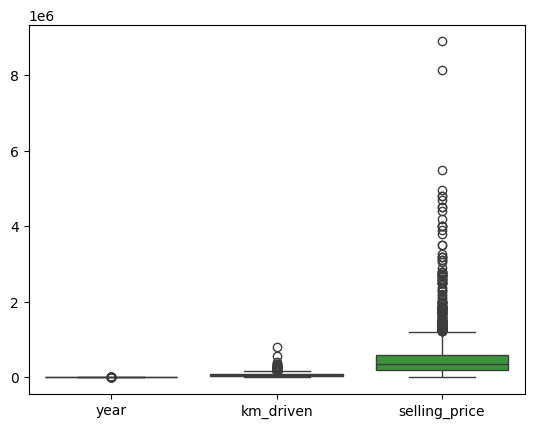

In [ ]:
sns.boxplot(df)

<Axes: ylabel='selling_price'>

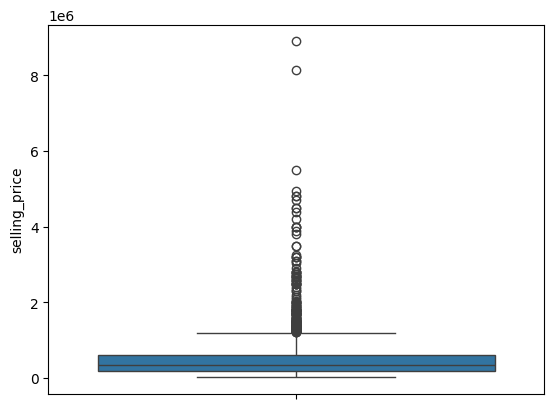

In [ ]:
sns.boxplot(df['selling_price'])

In [ ]:
q1 = df['selling_price'].quantile(0.25)
q3 = df['selling_price'].quantile(0.75)
iqr = q3-q1

In [ ]:
q1,q3,iqr

(200000.0, 600000.0, 400000.0)

In [ ]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit,upper_limit


(-400000.0, 1200000.0)

In [ ]:
df[df['selling_price'] > upper_limit ]

,name,year,km_driven,fuel,owner,selling_price
12,Toyota Corolla Altis 1.8 VL CVT,2018,25000,Petrol,First Owner,1650000
29,Jaguar XF 2.2 Litre Luxury,2014,28000,Diesel,First Owner,1964999
30,Mercedes-Benz New C-Class 220 CDI AT,2013,59000,Diesel,First Owner,1425000
35,Audi A6 2.0 TDI Design Edition,2013,50000,Diesel,First Owner,1735000
36,Mercedes-Benz New C-Class C 220 CDI Avantgarde,2012,33800,Diesel,Second Owner,1375000
...,...,...,...,...,...,...
4200,Ford Ecosport 1.5 Diesel Titanium Plus,2019,6590,Diesel,First Owner,1250000
4204,Ford Endeavour 3.2 Titanium AT 4X4,2016,126000,Diesel,First Owner,1800000
4224,Toyota Fortuner 2.7 2WD AT,2016,70000,Petrol,Second Owner,2500000
4228,Mahindra XUV500 W10 AWD,2015,70000,Diesel,First Owner,1225000


In [ ]:
df[df['selling_price'] < lower_limit ]

,name,year,km_driven,fuel,owner,selling_price


In [ ]:
new_df = df[df['selling_price'] > upper_limit ]

In [ ]:
new_df.shape

(170, 6)

<Axes: ylabel='selling_price'>

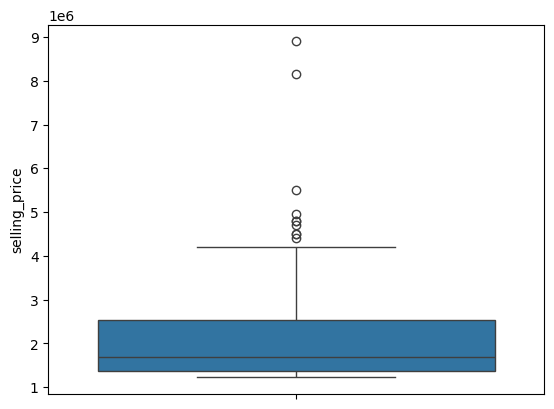

In [ ]:
sns.boxplot(new_df['selling_price'])

In [ ]:
new_df_cap = df.copy()

new_df_cap['selling_price'] = np.where(
    new_df_cap['selling_price'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['selling_price'] < lower_limit,
        lower_limit,
        new_df_cap['selling_price']
    )
)

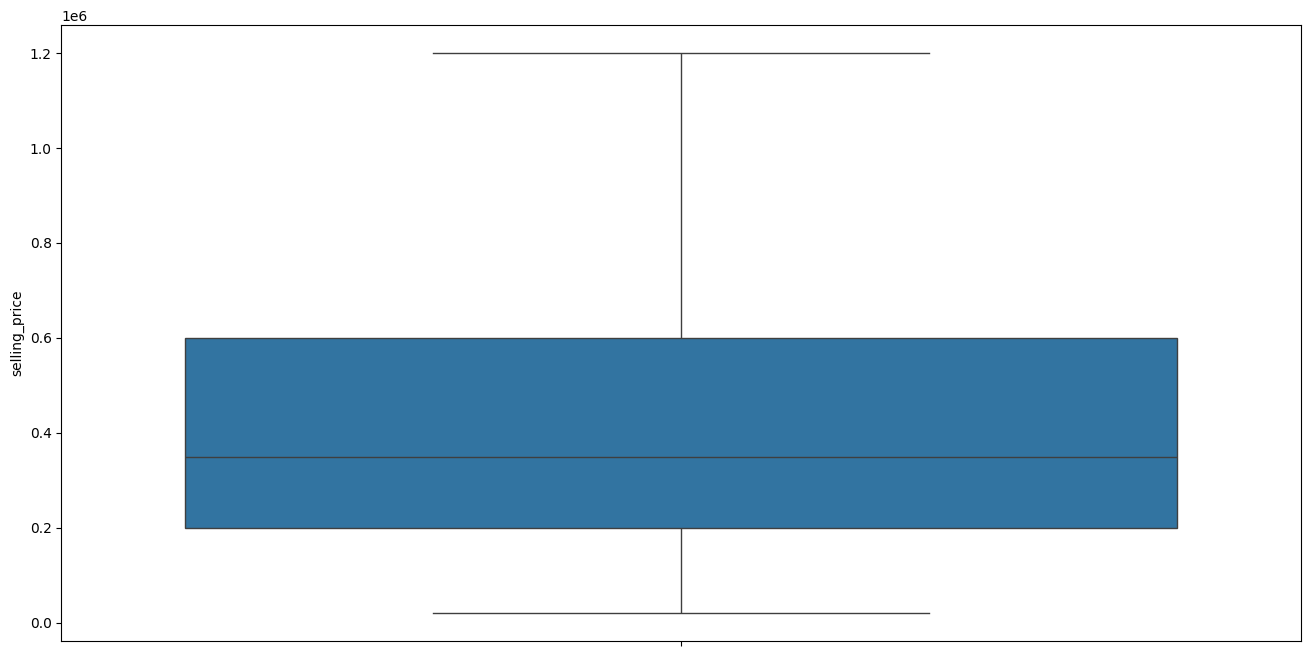

In [ ]:
plt.figure(figsize=(16,8))

sns.boxplot(new_df_cap['selling_price'])

plt.show()

<Axes: ylabel='km_driven'>

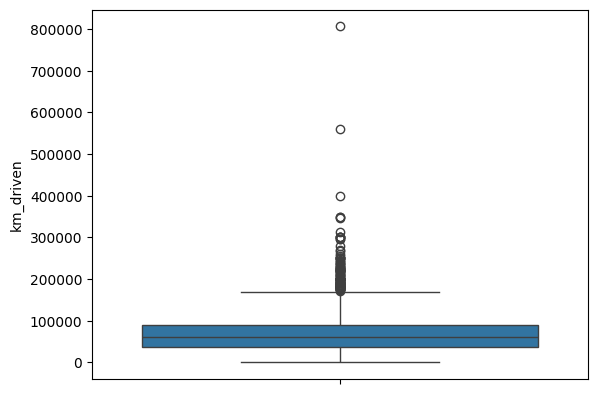

In [ ]:
sns.boxplot(df['km_driven'])

In [ ]:
q1 = df['km_driven'].quantile(0.25)
q3 = df['km_driven'].quantile(0.75)
iqr = q3-q1

In [ ]:
q1,q3,iqr

(36000.0, 90000.0, 54000.0)

In [ ]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
lower_limit,upper_limit

(-45000.0, 171000.0)

In [ ]:
df[df['km_driven'] > upper_limit ]

,name,year,km_driven,fuel,owner,selling_price
32,Audi Q5 2.0 TDI,2011,175900,Diesel,First Owner,1190000
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,350000,Diesel,Second Owner,280000
70,Toyota Corolla Altis Diesel D4DG,2011,230000,Diesel,First Owner,350000
159,Chevrolet Enjoy 1.3 TCDi LS 8,2015,175000,Diesel,First Owner,300000
197,Mahindra Xylo E4,2009,230000,Diesel,Third Owner,229999
...,...,...,...,...,...,...
4208,Toyota Qualis FS B3,2001,256000,Diesel,First Owner,150000
4231,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2011,230000,Diesel,First Owner,800000
4255,Mahindra XUV500 W8 2WD,2014,218000,Diesel,Second Owner,650000
4286,Fiat Punto 1.3 Emotion,2010,210000,Diesel,Second Owner,130000


In [ ]:
df[df['km_driven'] < lower_limit ]

,name,year,km_driven,fuel,owner,selling_price


<Axes: ylabel='km_driven'>

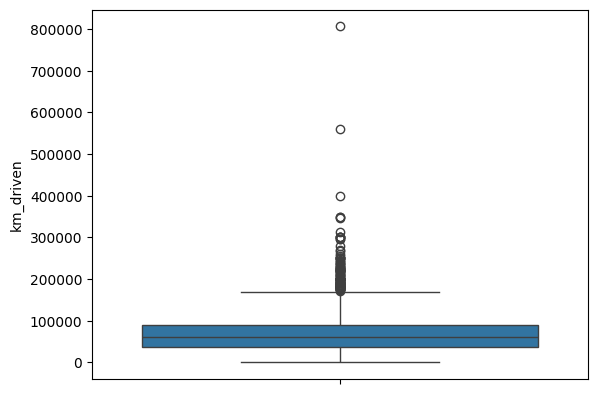

In [ ]:
sns.boxplot(df['km_driven'])

In [ ]:
new_df_cap = df.copy()

new_df_cap['km_driven'] = np.where(
    new_df_cap['km_driven'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['km_driven'] < lower_limit,
        lower_limit,
        new_df_cap['km_driven']
    )
)

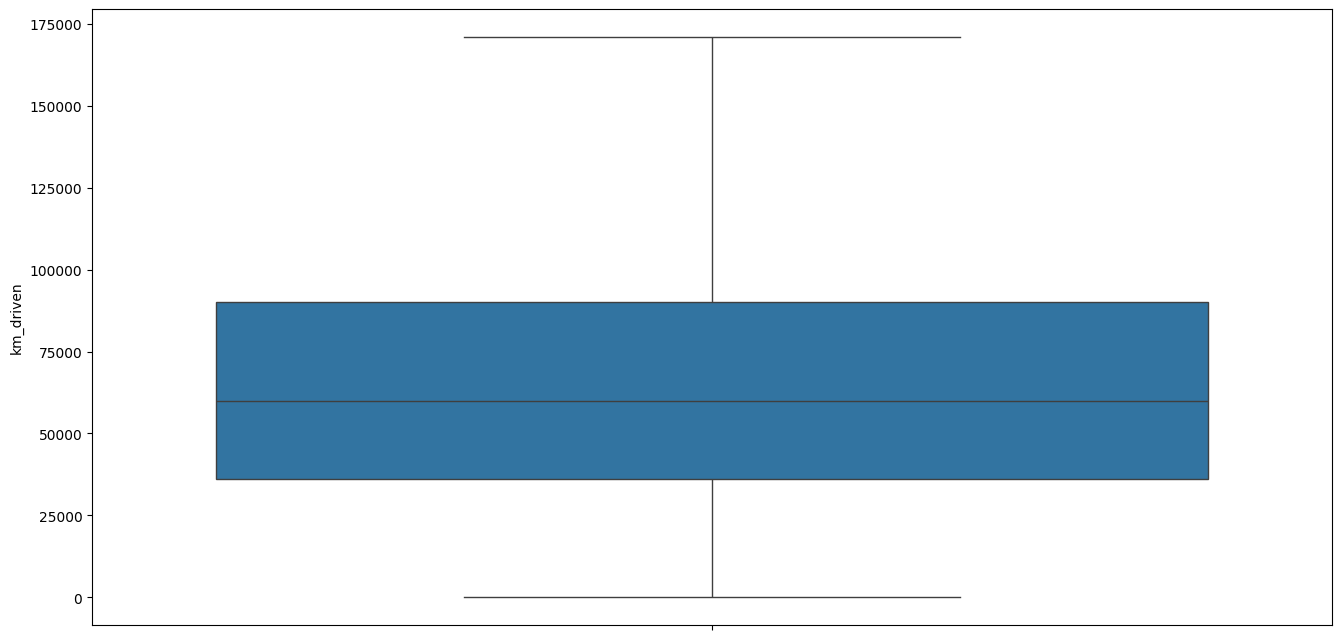

In [ ]:
plt.figure(figsize=(16,8))

sns.boxplot(new_df_cap['km_driven'])

plt.show()

<Axes: ylabel='year'>

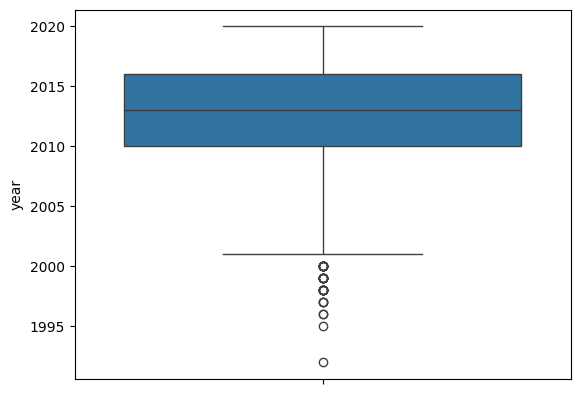

In [ ]:
sns.boxplot(df['year'])

In [ ]:
q1 = df['year'].quantile(0.25)
q3 = df['year'].quantile(0.75)
iqr = q3-q1

In [ ]:
q1,q3,iqr

(2010.0, 2016.0, 6.0)

In [ ]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
upper_limit,lower_limit

(2025.0, 2001.0)

In [ ]:
df[df['year'] > upper_limit]

,name,year,km_driven,fuel,owner,selling_price


In [ ]:
df[df['year']< lower_limit]

,name,year,km_driven,fuel,owner,selling_price
61,Mahindra Jeep CL 500 MDI,1996,35000,Diesel,Second Owner,250000
137,Maruti 800 Std,1998,40000,Petrol,Fourth & Above Owner,40000
372,Maruti 800 AC,2000,40000,Petrol,Third Owner,60000
391,Hyundai Santro GLS I - Euro I,1999,120000,Petrol,Second Owner,50000
631,Maruti Gypsy E MG410W ST,1995,100000,Petrol,Second Owner,95000
850,Maruti Zen LXI,1999,70000,Petrol,Second Owner,85000
1126,Maruti Esteem VX,1999,35000,Petrol,Second Owner,60000
1184,Maruti Gypsy King Hard Top,2000,60000,Petrol,Fourth & Above Owner,165000
1397,Mahindra Jeep MM 775 XDB,2000,50000,Diesel,Second Owner,155000
1404,Maruti 800 DX,2000,60000,Petrol,First Owner,50000


In [ ]:
new_df_cap = df.copy()

new_df_cap['year'] = np.where(
    new_df_cap['year'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['year'] < lower_limit,
        lower_limit,
        new_df_cap['year']
    )
)

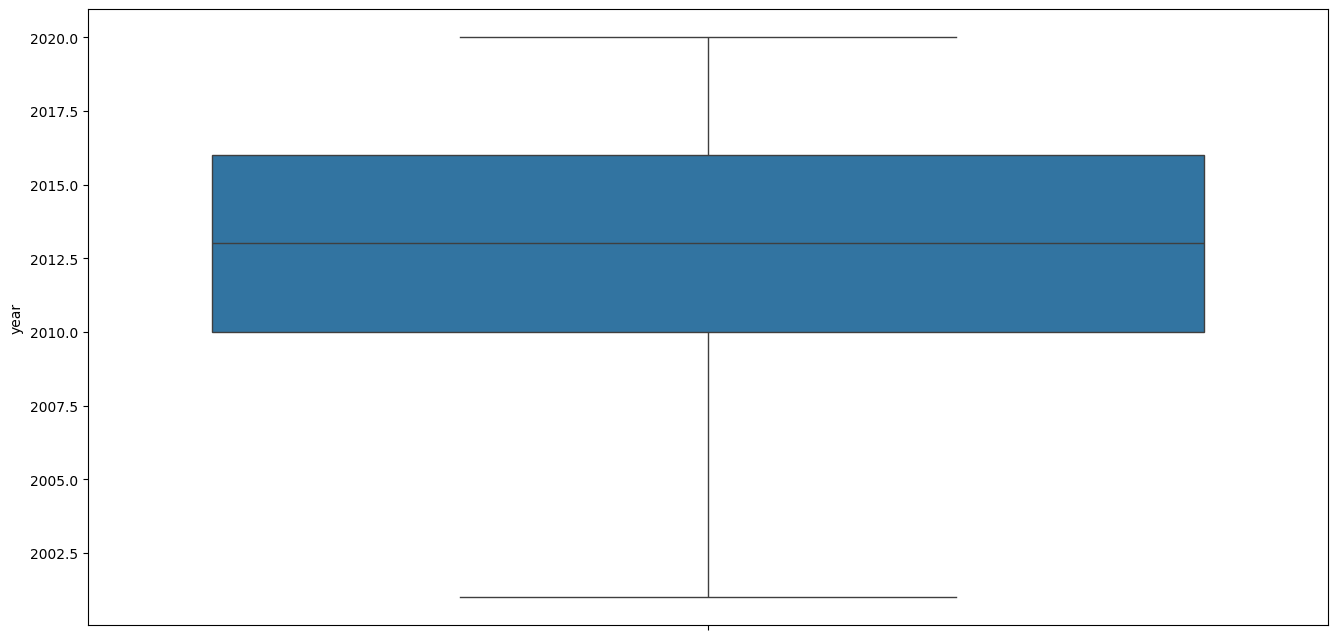

In [ ]:
plt.figure(figsize=(16,8))

sns.boxplot(new_df_cap['year'])

plt.show()

Text(0, 0.5, 'selling_price')

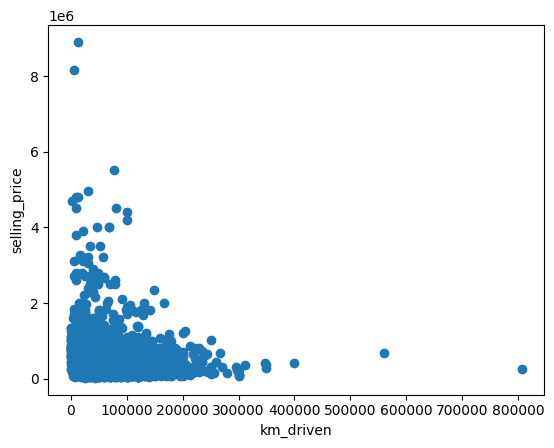

In [ ]:
plt.scatter(df['km_driven'],df['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('selling_price')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Extracting features (X) and target variable (y)
X = df[['km_driven']]
y = df['selling_price']

In [ ]:
X

,km_driven
0,70000
1,50000
2,100000
3,46000
4,141000
...,...
4335,80000
4336,80000
4337,83000
4338,90000


In [ ]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3577, dtype: int64

In [ ]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize linear regression model
model = LinearRegression()

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
# Example input data for prediction
new_km_driven = [[50000]]

In [ ]:
predicted_prices = model.predict(new_km_driven)
print("Predicted prices for the new input data:")
for i, price in enumerate(predicted_prices):
    print(f"Input km_driven: {new_km_driven[i][0]} | Predicted selling price: {price}")

Predicted prices for the new input data:
Input km_driven: 50000 | Predicted selling price: 507699.76772595476


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)


In [ ]:
print("Mean Squared Error:", mse)

Mean Squared Error: 307988220482.47314


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.043910802213658284


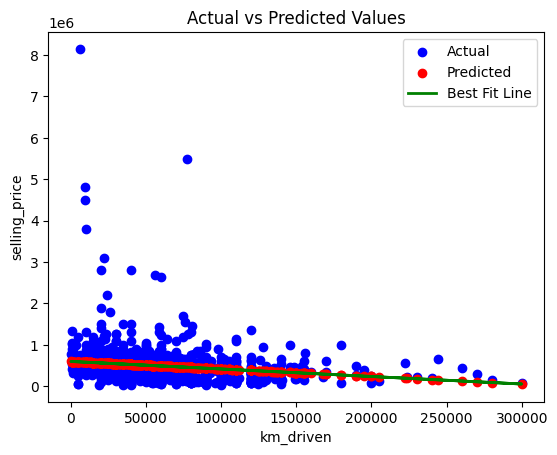

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plotting the predicted values
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# Plotting the best-fit line
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Best Fit Line')

# Adding labels and legend
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('Actual vs Predicted Values')
plt.legend()

# Showing the plot
plt.show()


In [ ]:
#Multiple linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Extracting features (X) and target variable (y)
X = df[['km_driven', 'year']]
y = df['selling_price']


In [ ]:
#spliting the data into traun and test (80% train, 20% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.fit(X_test)